In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from patsy import dmatrix
%matplotlib inline

In [2]:
sp = pd.read_csv(r'../DataSets/spy.csv')

In [3]:
sp.sort_values('Date', inplace=True)

In [4]:
sp.reset_index(drop=True, inplace=True)

In [5]:
sp

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Change,Overnight Change,Gap Pct,...,Signal_990,Signal_991,Signal_992,Signal_993,Signal_994,Signal_995,Signal_996,Signal_997,Signal_998,Signal_999
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,100.323436,0.959999,NaN,NaN,...,0,1,0,1,1,0,0,1,1,0
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,100.589001,0.369995,-0.070000,-0.061767,...,0,1,0,0,0,0,1,1,0,0
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,100.659822,0.190002,-0.110000,-0.096805,...,0,0,1,0,1,1,1,0,1,0
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,101.084736,0.690002,-0.209999,-0.184679,...,0,1,0,0,1,1,0,0,0,0
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,101.421122,0.680001,-0.300003,-0.262723,...,0,1,1,0,0,0,1,1,1,0
5,2010-01-11,115.080002,115.129997,114.239998,114.730003,106375700,101.562763,-0.349999,0.510002,0.445144,...,1,1,0,1,1,0,0,1,1,0
6,2010-01-12,113.970001,114.209999,113.220001,113.660004,163333500,100.615564,-0.309997,-0.760002,-0.662427,...,0,0,0,1,0,1,0,0,1,1
7,2010-01-13,113.949997,114.940002,113.370003,114.620003,161822000,101.465387,0.670006,0.289993,0.255141,...,0,0,0,0,0,1,0,1,1,0
8,2010-01-14,114.489998,115.139999,114.419998,114.930000,115718800,101.739807,0.440002,-0.130005,-0.113423,...,0,1,0,0,1,1,1,0,1,1
9,2010-01-15,114.730003,114.839996,113.199997,113.639999,212283100,100.597856,-1.090004,-0.199997,-0.174016,...,0,0,0,0,1,1,1,1,1,1


In [6]:
all_dates = sp[['Date']]

In [7]:
tkr_index = [x for x in all_dates.index if x % 15 == 0]

In [8]:
all_dates.ix[tkr_index]

/Users/palance/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Date
0,2010-01-04
15,2010-01-26
30,2010-02-17
45,2010-03-10
60,2010-03-31
75,2010-04-22
90,2010-05-13
105,2010-06-04
120,2010-06-25
135,2010-07-19


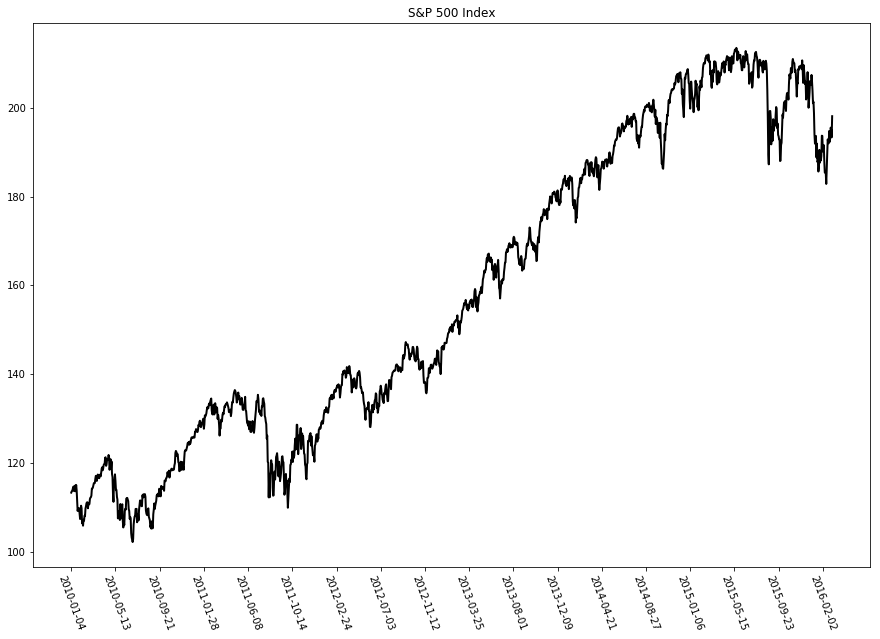

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('S&P 500 Index')
ax.plot(sp['Close'], color='k', linewidth=2)
ax.set_xticks(np.arange(0,len(sp),90));
ax.set_xticklabels([sp['Date'][x] for x in sp[['Date']].index if x % 90 == 0], rotation=-70);

In [10]:
ipos = pd.read_csv(r'../PrivateDatasets/ipo_data.csv', encoding='latin-1')

In [11]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2016/2/3,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,$24.00,$28.97,$28.32,18.00%,$4.97,$4.32,3,NaN
1,2016/2/3,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,$16.00,$18.00,$18.20,13.75%,$2.00,$2.20,2,NaN
2,2016/2/11,AveXis,AVXS,Goldman Sachs/ Jefferies,$20.00,$18.02,$18.05,-9.75%,($1.98),($1.95),2,Missed
3,2016/2/11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,$8.00,$8.00,$6.64,-17.00%,$0.00,($1.36),1,NaN
4,2016/2/24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,$10.00,$10.01,$10.21,2.10%,$0.01,$0.21,1,NaN
5,2015/1/16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,$14.00,$13.49,$13.50,-3.57%,($0.51),($0.50),1,NaN
6,2015/1/27,Zosano Pharma (ZSAN),ZSAN,Ladenburg Thalmann/ Roth Capital Partners,$11.00,$12.16,$11.10,0.91%,$1.16,$0.10,1,NaN
7,2015/1/28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,$18.00,$21.50,$18.83,4.61%,$3.50,$0.83,2,NaN
8,2015/1/29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,$17.00,$19.26,$22.00,29.41%,$2.26,$5.00,2,NaN
9,2015/1/29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,$16.00,$19.00,$14.95,-6.56%,$3.00,($1.05),2,NaN


In [12]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))
ipos = ipos.applymap(lambda x: x if not '(' in str(x) else x.replace('(',''))
ipos = ipos.applymap(lambda x: x if not ')' in str(x) else x.replace(')',''))

In [13]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2016/2/3,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN
1,2016/2/3,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN
2,2016/2/11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed
3,2016/2/11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN
4,2016/2/24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN
5,2015/1/16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1,NaN
6,2015/1/27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1,NaN
7,2015/1/28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2,NaN
8,2015/1/29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2,NaN
9,2015/1/29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2,NaN


In [14]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 12 columns):
Date                       1129 non-null object
Issuer                     1129 non-null object
Symbol                     1129 non-null object
Lead/Joint-Lead Manager    1129 non-null object
Offer Price                1129 non-null object
Opening Price              1129 non-null object
1st Day Close              1129 non-null object
1st Day % Px Chng          1129 non-null object
$ Chg Opening              1129 non-null object
$ Chg Close                1129 non-null object
Star Ratings               1129 non-null object
Performed                  112 non-null object
dtypes: object(12)
memory usage: 105.9+ KB


In [15]:
ipos.replace('N/C',0, inplace=True)

In [16]:
# ipos[ipos['Date']=='11/120']         # 当出现错误时，为什么不修改数据，而是修改代码呢？
# ipos.loc[1660, 'Date'] = pd.to_datetime('2012-11-20')

In [17]:
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng '] = ipos['1st Day % Px Chng '].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [18]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 12 columns):
Date                       1129 non-null datetime64[ns]
Issuer                     1129 non-null object
Symbol                     1129 non-null object
Lead/Joint-Lead Manager    1129 non-null object
Offer Price                1129 non-null float64
Opening Price              1129 non-null float64
1st Day Close              1129 non-null float64
1st Day % Px Chng          1129 non-null float64
$ Chg Opening              1129 non-null float64
$ Chg Close                1129 non-null float64
Star Ratings               1129 non-null int64
Performed                  112 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 105.9+ KB


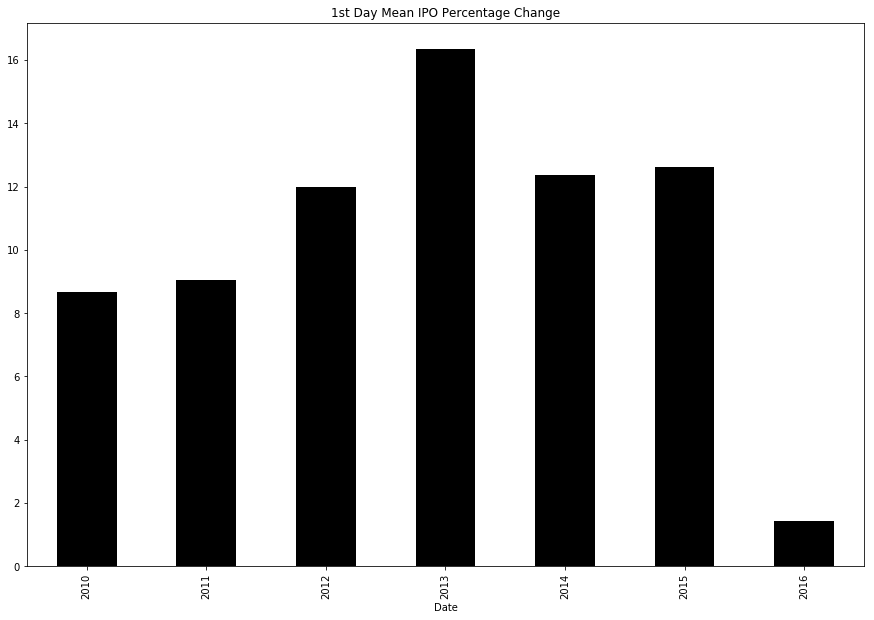

In [19]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng ']\
.mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

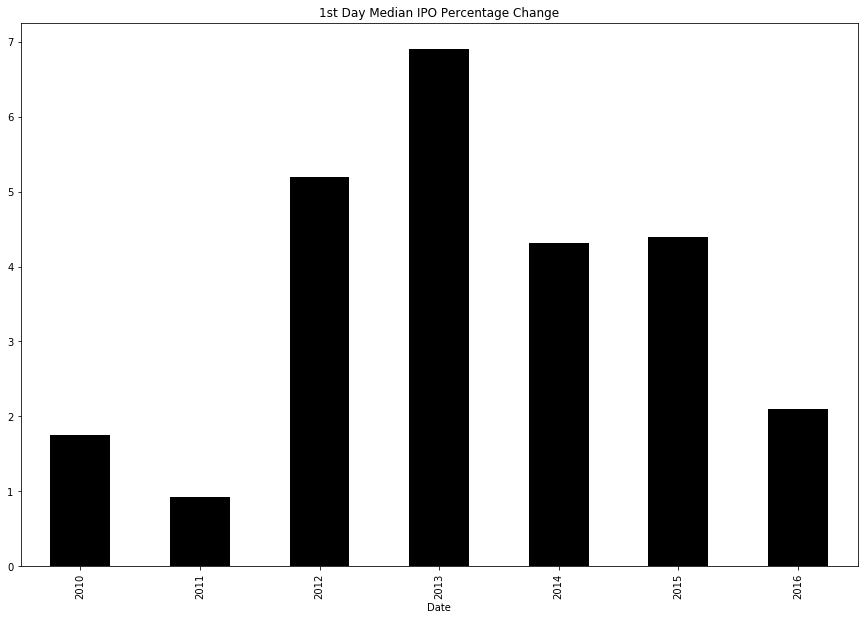

In [20]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng ']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

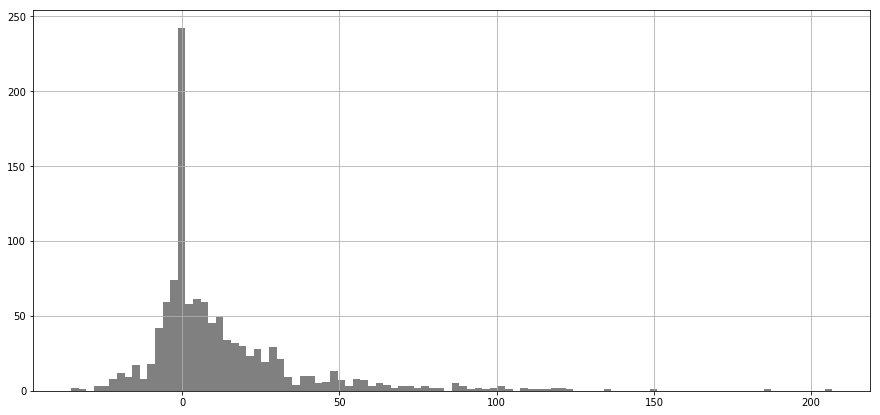

In [21]:
ipos['1st Day % Px Chng '].hist(figsize=(15,7), bins=100, color='grey')

In [22]:
ipos['1st Day % Px Chng '].describe()

count    1129.000000
mean       12.166608
std        25.171224
min       -35.220000
25%        -0.590000
50%         3.750000
75%        18.670000
max       206.670000
Name: 1st Day % Px Chng , dtype: float64

In [23]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [24]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed,-0.03,-0.166482
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN,1.36,17.000000
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1,NaN,-0.01,-0.074129
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1,NaN,-1.06,-8.717105
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2,NaN,-2.67,-12.418605
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2,NaN,2.74,14.226376
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2,NaN,-1.95,-10.263158


In [25]:
ipos['% Chg Open to Close'].describe()

count    1129.000000
mean        2.147852
std        10.001772
min      -106.601942
25%        -1.451613
50%         0.555556
75%         5.000000
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [26]:
ipos[ipos['% Chg Open to Close']<-98]

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
158,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,5.15,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942


In [27]:
# ipos.loc[440, '$ Chg Opening'] = .09

In [28]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [29]:
ipos['% Chg Open to Close'].describe()

count    1129.000000
mean        2.147852
std        10.001772
min      -106.601942
25%        -1.451613
50%         0.555556
75%         5.000000
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [30]:
ipos[ipos['% Chg Open to Close']<-45]

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
158,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.00,5.15,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942
1012,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1,NaN,-10.97,-49.281222


In [31]:
# ipos.loc[1264, '$ Chg Opening'] = .01
# ipos.loc[1264, 'Opening Price'] = 11.26

In [32]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [33]:
ipos['% Chg Open to Close'].describe()

count    1129.000000
mean        2.147852
std        10.001772
min      -106.601942
25%        -1.451613
50%         0.555556
75%         5.000000
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [34]:
ipos.sort_values('% Chg Open to Close')

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
158,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.00,5.15,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942
1012,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1,NaN,-10.97,-49.281222
922,2011-07-20,Zillow,Z,Citi,20.00,60.00,35.77,78.85,40.00,15.77,3,NaN,-24.23,-40.383333
389,2014-10-03,Yodlee,YDLE,Goldman Sachs/ Credit Suisse/ BofA Merrill Lynch,12.00,18.81,13.44,12.00,6.81,1.44,3,NaN,-5.37,-28.548644
368,2014-09-18,ProQR Therapeutics B.V.,PRQR,Leerink Partners/ Deutsche Bank Securities,13.00,19.90,14.73,13.31,6.90,1.73,2,NaN,-5.17,-25.979899
211,2014-03-19,Paylocity Holding,PCTY,Deutsche Bank Securities/ BofA Merrill Lynch/ ...,17.00,31.00,24.04,41.41,14.00,7.04,3,NaN,-6.96,-22.451613
367,2014-09-18,Foamix Ltd.,FOMX,Barclays/ Cowen and Company,6.00,8.00,6.22,3.67,2.00,0.22,1,NaN,-1.78,-22.250000
623,2013-10-17,ADMA Biologics,ADMA,Oppenheimer & Co.,8.50,7.00,8.55,0.59,1.50,0.05,1,NaN,-1.45,-20.714286
559,2013-07-25,Onconova Therapeutics,ONTX,Citigroup/ Leerink Swann,15.00,25.00,19.88,32.53,10.00,4.88,3,NaN,-5.12,-20.480000
482,2013-03-27,NV5 Holdings,NVEE.U,Roth Capital Partners,6.00,8.00,6.42,7.00,2.00,0.42,1,NaN,-1.58,-19.750000


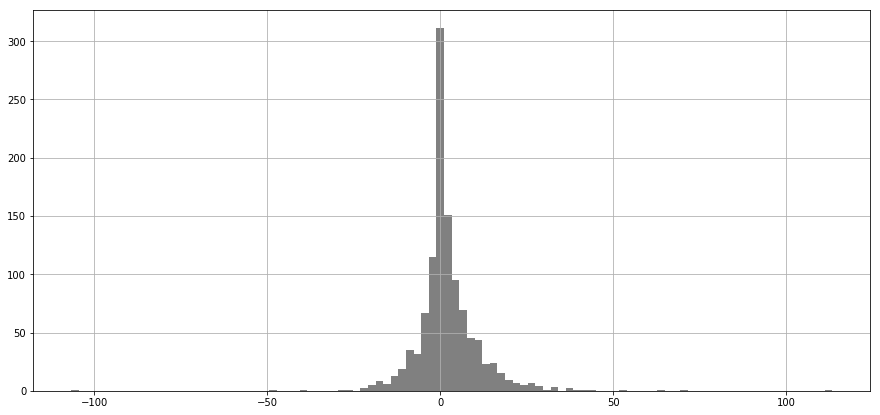

In [35]:
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

In [36]:
ipos[ipos['Date']>='2015-01-01']['% Chg Open to Close'].describe()

count    162.000000
mean       1.863347
std       13.187147
min     -106.601942
25%       -2.000634
50%        0.788889
75%        5.029167
max       63.903061
Name: % Chg Open to Close, dtype: float64

In [37]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].sum()

64.24

In [38]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    99.000000
mean      1.282222
std       2.541689
min       0.010000
25%       0.200000
50%       0.610000
75%       1.245000
max      20.040000
Name: $ Chg Open to Close, dtype: float64

In [39]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    55.000000
mean     -1.140000
std       1.317571
min      -6.160000
25%      -1.485000
50%      -0.720000
75%      -0.220000
max      -0.010000
Name: $ Chg Open to Close, dtype: float64

In [40]:
sp

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Change,Overnight Change,Gap Pct,...,Signal_990,Signal_991,Signal_992,Signal_993,Signal_994,Signal_995,Signal_996,Signal_997,Signal_998,Signal_999
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,100.323436,0.959999,NaN,NaN,...,0,1,0,1,1,0,0,1,1,0
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,100.589001,0.369995,-0.070000,-0.061767,...,0,1,0,0,0,0,1,1,0,0
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,100.659822,0.190002,-0.110000,-0.096805,...,0,0,1,0,1,1,1,0,1,0
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,101.084736,0.690002,-0.209999,-0.184679,...,0,1,0,0,1,1,0,0,0,0
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,101.421122,0.680001,-0.300003,-0.262723,...,0,1,1,0,0,0,1,1,1,0
5,2010-01-11,115.080002,115.129997,114.239998,114.730003,106375700,101.562763,-0.349999,0.510002,0.445144,...,1,1,0,1,1,0,0,1,1,0
6,2010-01-12,113.970001,114.209999,113.220001,113.660004,163333500,100.615564,-0.309997,-0.760002,-0.662427,...,0,0,0,1,0,1,0,0,1,1
7,2010-01-13,113.949997,114.940002,113.370003,114.620003,161822000,101.465387,0.670006,0.289993,0.255141,...,0,0,0,0,0,1,0,1,1,0
8,2010-01-14,114.489998,115.139999,114.419998,114.930000,115718800,101.739807,0.440002,-0.130005,-0.113423,...,0,1,0,0,1,1,1,0,1,1
9,2010-01-15,114.730003,114.839996,113.199997,113.639999,212283100,100.597856,-1.090004,-0.199997,-0.174016,...,0,0,0,0,1,1,1,1,1,1


In [41]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 16
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [42]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [43]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700,-1.015042
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111,-1.015042
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed,-0.03,-0.166482,-0.204681
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN,1.36,17.000000,-0.204681
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002,-0.686799
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1,NaN,-0.01,-0.074129,-4.202164
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1,NaN,-1.06,-8.717105,0.009738
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2,NaN,-2.67,-12.418605,0.505653
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2,NaN,2.74,14.226376,0.160140
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2,NaN,-1.95,-10.263158,0.160140


In [44]:
# ipos[ipos['Date']=='2009-08-01']

In [45]:
# ipos.loc[1175, 'Date'] = pd.to_datetime('2009-08-12')

In [46]:
# ipos[ipos['Date']=='2013-11-16']

In [47]:
# ipos.loc[1865, 'Date'] = pd.to_datetime('2013-11-06')

In [48]:
# ipos[ipos['Date']=='2015-02-21']

In [49]:
# ipos.loc[2251, 'Date'] = pd.to_datetime('2015-05-21')
# ipos.loc[2252, 'Date'] = pd.to_datetime('2015-05-21')

In [50]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [51]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700,-1.015042
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111,-1.015042
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed,-0.03,-0.166482,-0.204681
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN,1.36,17.000000,-0.204681
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002,-0.686799
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1,NaN,-0.01,-0.074129,-4.202164
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1,NaN,-1.06,-8.717105,0.009738
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2,NaN,-2.67,-12.418605,0.505653
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2,NaN,2.74,14.226376,0.160140
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2,NaN,-1.95,-10.263158,0.160140


In [52]:
sp

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Change,Overnight Change,Gap Pct,...,Signal_990,Signal_991,Signal_992,Signal_993,Signal_994,Signal_995,Signal_996,Signal_997,Signal_998,Signal_999
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,100.323436,0.959999,NaN,NaN,...,0,1,0,1,1,0,0,1,1,0
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,100.589001,0.369995,-0.070000,-0.061767,...,0,1,0,0,0,0,1,1,0,0
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,100.659822,0.190002,-0.110000,-0.096805,...,0,0,1,0,1,1,1,0,1,0
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,101.084736,0.690002,-0.209999,-0.184679,...,0,1,0,0,1,1,0,0,0,0
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,101.421122,0.680001,-0.300003,-0.262723,...,0,1,1,0,0,0,1,1,1,0
5,2010-01-11,115.080002,115.129997,114.239998,114.730003,106375700,101.562763,-0.349999,0.510002,0.445144,...,1,1,0,1,1,0,0,1,1,0
6,2010-01-12,113.970001,114.209999,113.220001,113.660004,163333500,100.615564,-0.309997,-0.760002,-0.662427,...,0,0,0,1,0,1,0,0,1,1
7,2010-01-13,113.949997,114.940002,113.370003,114.620003,161822000,101.465387,0.670006,0.289993,0.255141,...,0,0,0,0,0,1,0,1,1,0
8,2010-01-14,114.489998,115.139999,114.419998,114.930000,115718800,101.739807,0.440002,-0.130005,-0.113423,...,0,1,0,0,1,1,1,0,1,1
9,2010-01-15,114.730003,114.839996,113.199997,113.639999,212283100,100.597856,-1.090004,-0.199997,-0.174016,...,0,0,0,0,1,1,1,1,1,1


In [53]:
def get_cto_chg(ipo_dt):
    try:
        today_open_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

In [54]:
ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)

In [55]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700,-1.015042,0.657341
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111,-1.015042,0.657341
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed,-0.03,-0.166482,-0.204681,-1.581480
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN,1.36,17.000000,-0.204681,-1.581480
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002,-0.686799,0.000000
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1,NaN,-0.01,-0.074129,-4.202164,-0.125616
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1,NaN,-1.06,-8.717105,0.009738,-1.207104
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2,NaN,-2.67,-12.418605,0.505653,0.705333
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2,NaN,2.74,14.226376,0.160140,0.119919
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2,NaN,-1.95,-10.263158,0.160140,0.119919


In [56]:
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Manager'].map(lambda x: x.split('/')[0])

In [57]:
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [59]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Axiom Capital Management
BMO Capital Markets
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Barclays
Barclays Capital
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lynch
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
Canaccord Genuity
Cantor Fitzgerald
Cantor Fitzgerald & Co.
Chardan Capital Markets
Cit
Citi
Citigroup
Cohen & Company Capital Markets, LLC   I-Bankers Securities
Cowen
Cowen and Company
Credit Suisse
D.A. Davidson & Co.
Dawson James Securities
Deutsche Bank
Deutsche Bank Securities
EarlyBirdCapita
EarlyBirdCapital
EarlyBirdCapital, Inc.
FBR
FBR Capital Markets
Feltl and Company
Global Hunter Securities, LLC
Goldman Sachs
Goldman Sachs Asia
Goldman Sachs Asia L.L.C.
Goldman, Sach
Goldman, Sachs
Goldman, Sachs & Co.
Imperial Capital
J.P. Morgan
J.P. Morgan Securities
J.P. Morgan Securities Merrill Lynch
J.P.Morgan
JMP Securities
Janney Montgomery 

In [60]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [61]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

Aegis Capital
Axiom Capital Management
BMO Capital Markets
Barclays
BofA Merrill Lynch
Broadband Capital
Burnham Securities
C&Co
CSFB
Canaccord Genuity
Cantor Fitzgerald
Chardan Capital Markets
Citigroup
Cohen & Co.
Cowen & Co.
DA Davidson
Dawson James Securities
Deutsche Bank
EarlyBirdCapital
Feltl & Co.
Friedman Billings Ramsey
Global Hunter Securities, LLC
Goldman Sachs
Imperial Capital
JMP Securities
JP Morgan
Janney Montgomery Scott
Jefferies
Johnson Rice
Keefe, Bruyette & Woods
Ladenburg Thalmann
Laidlaw & Company UK Ltd.
Lazard Capital Markets
Leerink Partners
MDB Capital Group LLC
MDB Capital Group, LLC
Maxim Group
Morgan Joseph
Morgan Keegan
Morgan Stanley
Needham & Company
Oppenheimer
Paulson Investment Co.
Piper Jaffray
PrinceRidge
RBC Capital Markets
RW Baird
Raymond James
Rodman & Renshaw
Roth Capital
Sandler O'Neil + Partners
Stifel Nicolaus
SunTrust Robinson
Sunrise Securities
Thomas Weisel Partners
UBS Investment Bank
Wells Fargo Securities
WestPark Capital
William Blai

In [64]:
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Manager'].map(lambda x: len(x.split('/')))
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700,-1.015042,0.657341,Goldman Sachs,3
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111,-1.015042,0.657341,Morgan Stanley,2
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed,-0.03,-0.166482,-0.204681,-1.581480,Goldman Sachs,2
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN,1.36,17.000000,-0.204681,-1.581480,Leerink Partners,2
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002,-0.686799,0.000000,Deutsche Bank,3
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1,NaN,-0.01,-0.074129,-4.202164,-0.125616,UBS Investment Bank,3
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1,NaN,-1.06,-8.717105,0.009738,-1.207104,Ladenburg Thalmann,2
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2,NaN,-2.67,-12.418605,0.505653,0.705333,BofA Merrill Lynch,2
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2,NaN,2.74,14.226376,0.160140,0.119919,BofA Merrill Lynch,2
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2,NaN,-1.95,-10.263158,0.160140,0.119919,Jefferies,2


In [65]:
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})

In [66]:
ipos['Month'] = ipos['Date'].map(lambda x: x.month)

In [67]:
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [68]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700,-1.015042,0.657341,Goldman Sachs,3,Wed,Feb
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111,-1.015042,0.657341,Morgan Stanley,2,Wed,Feb
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed,-0.03,-0.166482,-0.204681,-1.581480,Goldman Sachs,2,Thurs,Feb
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN,1.36,17.000000,-0.204681,-1.581480,Leerink Partners,2,Thurs,Feb
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002,-0.686799,0.000000,Deutsche Bank,3,Wed,Feb
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,1,NaN,-0.01,-0.074129,-4.202164,-0.125616,UBS Investment Bank,3,Fri,Jan
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,1,NaN,-1.06,-8.717105,0.009738,-1.207104,Ladenburg Thalmann,2,Tues,Jan
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,2,NaN,-2.67,-12.418605,0.505653,0.705333,BofA Merrill Lynch,2,Wed,Jan
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,2,NaN,2.74,14.226376,0.160140,0.119919,BofA Merrill Lynch,2,Thurs,Jan
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,2,NaN,-1.95,-10.263158,0.160140,0.119919,Jefferies,2,Thurs,Jan


In [69]:
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100

In [70]:
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
                             ipos['$ Chg Opening'].astype('float'))/\
                             ipos['Opening Price'].astype('float') * 100

In [71]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,...,-0.65,-2.243700,-1.015042,0.657341,Goldman Sachs,3,Wed,Feb,17.155678,-2.243700
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,...,0.20,1.111111,-1.015042,0.657341,Morgan Stanley,2,Wed,Feb,11.111111,1.111111
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,...,-0.03,-0.166482,-0.204681,-1.581480,Goldman Sachs,2,Thurs,Feb,10.987791,-0.166482
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,...,1.36,17.000000,-0.204681,-1.581480,Leerink Partners,2,Thurs,Feb,0.000000,17.000000
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,...,0.20,1.998002,-0.686799,0.000000,Deutsche Bank,3,Wed,Feb,0.099900,1.998002
5,2015-01-16,Patriot National,PN,UBS Investment Bank/ BMO Capital Markets/ SunT...,14.00,13.49,13.50,-3.57,0.51,0.50,...,-0.01,-0.074129,-4.202164,-0.125616,UBS Investment Bank,3,Fri,Jan,3.780578,-0.074129
6,2015-01-27,Zosano Pharma ZSAN,ZSAN,Ladenburg Thalmann/ Roth Capital Partners,11.00,12.16,11.10,0.91,1.16,0.10,...,-1.06,-8.717105,0.009738,-1.207104,Ladenburg Thalmann,2,Tues,Jan,9.539474,-8.717105
7,2015-01-28,Ascendis Pharma A/S,ASND,BofA Merrill Lynch/ Leerink Partners,18.00,21.50,18.83,4.61,3.50,0.83,...,-2.67,-12.418605,0.505653,0.705333,BofA Merrill Lynch,2,Wed,Jan,16.279070,-12.418605
8,2015-01-29,Entellus Medical,ENTL,BofA Merrill Lynch/ Piper Jaffray,17.00,19.26,22.00,29.41,2.26,5.00,...,2.74,14.226376,0.160140,0.119919,BofA Merrill Lynch,2,Thurs,Jan,11.734164,14.226376
9,2015-01-29,Flex Pharma,FLKS,Jefferies/ Piper Jaffray,16.00,19.00,14.95,-6.56,3.00,1.05,...,-1.95,-10.263158,0.160140,0.119919,Jefferies,2,Thurs,Jan,15.789474,-10.263158


In [72]:
ipos.columns

Index(['Date', 'Issuer', 'Symbol', 'Lead/Joint-Lead Manager', 'Offer Price',
       'Opening Price', '1st Day Close', '1st Day % Px Chng ', '$ Chg Opening',
       '$ Chg Close', 'Star Ratings', 'Performed', '$ Chg Open to Close',
       '% Chg Open to Close', 'SP Week Change', 'SP Close to Open Chg Pct',
       'Lead Mgr', 'Total Underwriters', 'Week Day', 'Month', 'Gap Open Pct',
       'Open to Close Pct'],
      dtype='object')

In [73]:
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +\
                  Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
                  Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, return_type='dataframe')

In [74]:
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,17.155678,4.97,24.00,28.97,0.657341,-1.015042
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.111111,2.00,16.00,18.00,0.657341,-1.015042
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,10.987791,1.98,20.00,18.02,-1.581480,-0.204681
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.000000,0.00,8.00,8.00,-1.581480,-0.204681
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.099900,0.01,10.00,10.01,0.000000,-0.686799
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.780578,0.51,14.00,13.49,-0.125616,-4.202164
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.539474,1.16,11.00,12.16,-1.207104,0.009738
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.279070,3.50,18.00,21.50,0.705333,0.505653
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.734164,2.26,17.00,19.26,0.119919,0.160140
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,15.789474,3.00,16.00,19.00,0.119919,0.160140


In [78]:
# Index of first 2015 IPO is 2188, 2014 is 1900
idx = 979
X_train, X_test = X[:idx], X[idx:]
y_train = ipos['$ Chg Open to Close'][:idx].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][idx:].map(lambda x: 1 if x >= .25 else 0)

In [79]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
clf.score(X_test, y_test)

0.55333333333333334

In [86]:
ipos[(ipos['Date']>='2010-01-01')]['$ Chg Open to Close'].describe()

count    1129.000000
mean        0.342294
std         1.985983
min       -24.230000
25%        -0.220000
50%         0.060000
75%         0.750000
max        20.040000
Name: $ Chg Open to Close, dtype: float64

In [87]:
pred_label = clf.predict(X_test)

In [88]:
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

In [89]:
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [90]:
rf

,index,$ chg,predicted,actual,correct
0,979,0.16,1,0,0
1,980,0.20,1,0,0
2,981,-0.10,1,0,0
3,982,0.06,0,0,1
4,983,0.01,0,0,1
5,984,0.04,0,0,1
6,985,0.50,0,1,0
7,986,-0.75,0,0,1
8,987,0.00,1,0,0
9,988,2.30,0,1,0


In [91]:
rf[rf['predicted']==1]['$ chg'].sum()

19.349999999999998

In [92]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].sum()

64.24

In [93]:
rf[rf['predicted']==1]['$ chg'].describe()

count    33.000000
mean      0.586364
std       1.278153
min      -0.920000
25%       0.000000
50%       0.160000
75%       0.710000
max       4.980000
Name: $ chg, dtype: float64

Text(0.5,0,'Index')

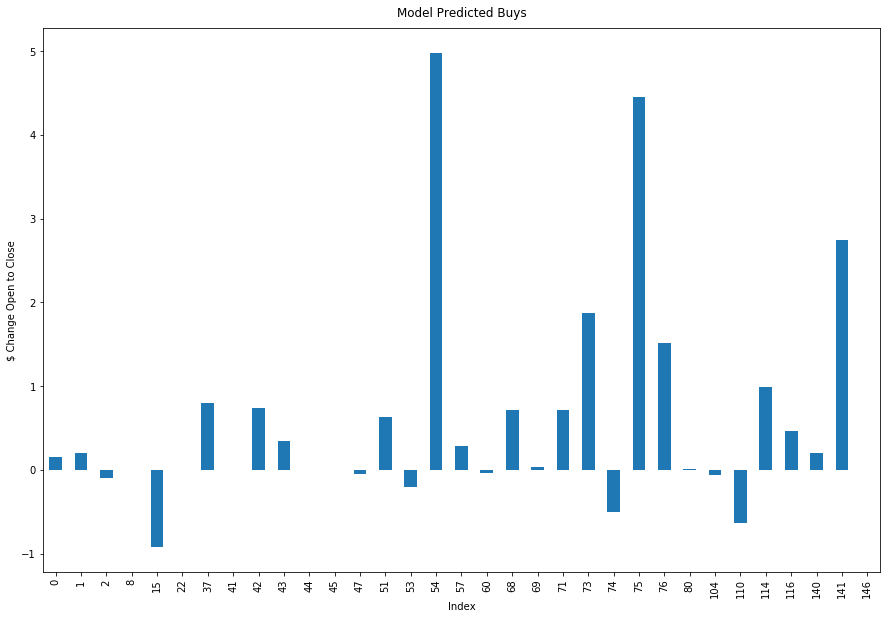

In [94]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [95]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,0.963653,"Q(""Lead Mgr"")[T.UBS Investment Bank]"
1,0.845142,"Q(""Lead Mgr"")[T.Piper Jaffray]"
2,0.813113,"Q(""Lead Mgr"")[T.Sandler O'Neil + Partners]"
3,0.768473,"Q(""Lead Mgr"")[T.Friedman Billings Ramsey]"
4,0.742270,"Q(""Lead Mgr"")[T.JP Morgan]"
5,0.568292,"Q(""Lead Mgr"")[T.Imperial Capital]"
6,0.538884,"Q(""Lead Mgr"")[T.MDB Capital Group, LLC]"
7,0.510823,"Q(""Lead Mgr"")[T.Laidlaw & Company UK Ltd.]"
8,0.508626,"Q(""Lead Mgr"")[T.Johnson Rice]"
9,0.483057,"Q(""Lead Mgr"")[T.Canaccord Genuity]"


In [96]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.329812,"Q(""Week Day"")[T.Mon]"
13,-0.089274,"Q(""Week Day"")[T.Thurs]"
14,-0.342864,"Q(""Week Day"")[T.Tues]"
15,0.014645,"Q(""Week Day"")[T.Wed]"


In [97]:
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]

,Date,Issuer,Symbol,Lead/Joint-Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
912,2011-06-22,Fidus Investment,FDUS,Morgan Keegan,15.0,14.75,15.0,0.0,0.25,0.0,...,-0.25,-1.694915,-4.040028,-0.308995,Morgan Keegan,1,Wed,Jun,1.694915,-1.694915


In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
clf_rf = RandomForestClassifier(n_estimators=5000)

In [100]:
model = clf_rf.fit(X_train, y_train)

In [101]:
clf_rf.score(X_test, y_test)

0.54000000000000004

In [102]:
pred_label_rf = model.predict(X_test)

In [103]:
results_rf=[]
for pl, tl, idx, chg in zip(pred_label_rf, y_test, y_test.index, ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results_rf.append([idx, chg, pl, tl, 1])
    else:
        results_rf.append([idx, chg, pl, tl, 0])

In [104]:
rf2 = pd.DataFrame(results_rf, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])

In [105]:
rf2.sort_values('$ chg', ascending=False)

,index,$ chg,predicted,actual,correct
79,1058,6.50,0,1,0
132,1111,5.41,0,1,0
54,1033,4.98,1,1,1
75,1054,4.45,0,1,0
141,1120,2.75,0,1,0
136,1115,2.62,0,1,0
9,988,2.30,0,1,0
98,1077,2.25,0,1,0
119,1098,1.99,1,1,1
134,1113,1.90,0,1,0


In [106]:
rf2[rf2['predicted']==1]['$ chg'].sum()

8.649999999999999

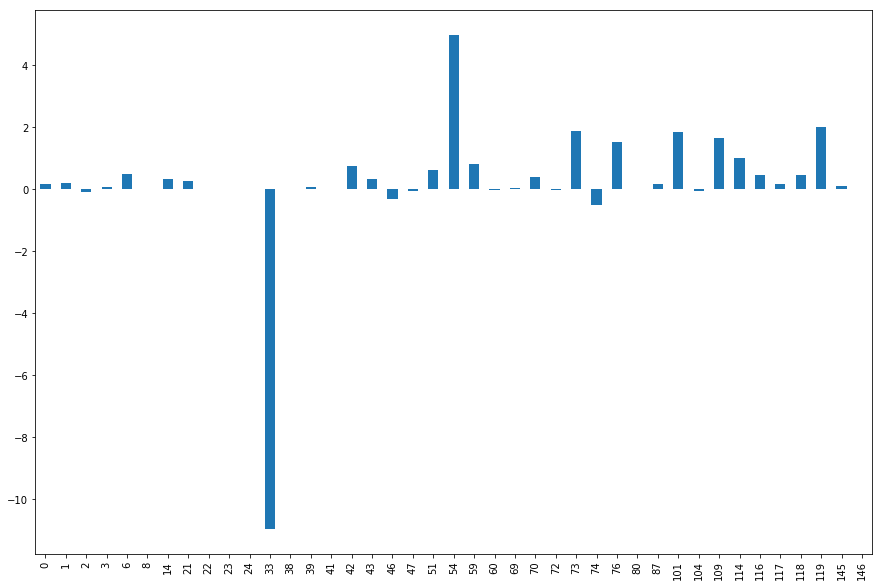

In [107]:
rf2[rf2['predicted']==1]['$ chg'].plot(kind='bar', figsize=(15,10))

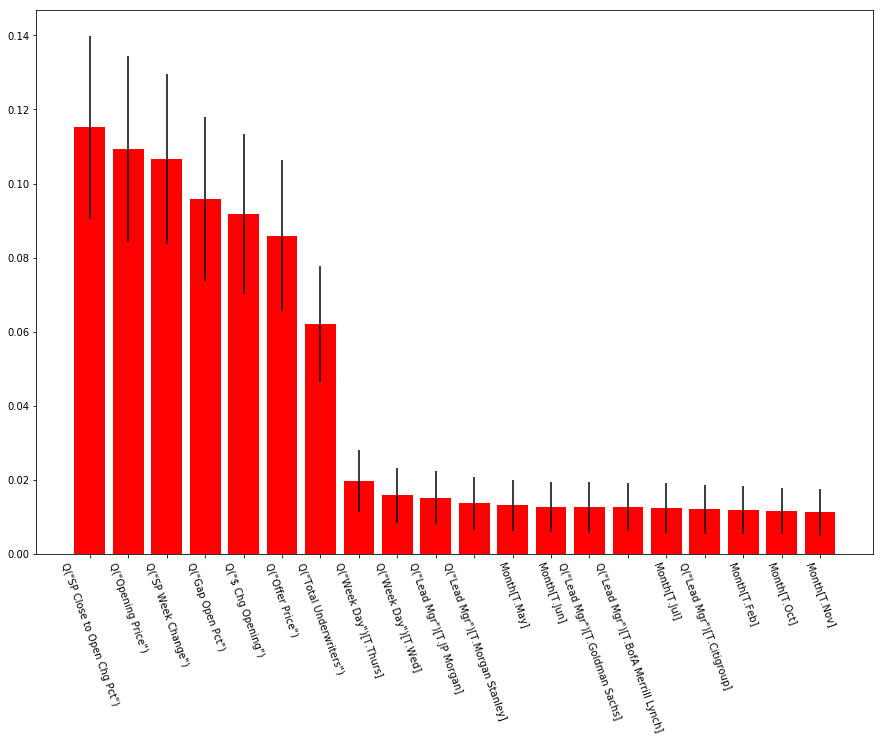

In [108]:
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);